# ナイトシフトのみ（$eqQ = 0$）の場合の粉末パターンスペクトル  

（初版：2020年3月、更新：2023年2月21日）  

### **共鳴周波数とナイトシフト**  

共鳴周波数$\nu(\theta, \phi)$は  

　　$\nu (\theta, \phi) = \gamma_n H_0 [1+K(\theta, \phi)]$  

と書ける。  
ここで、$H_0$は外部磁場（T）、$\gamma_n$は核磁気回転比（MHz/T）、$K(\theta, \phi)$はナイトシフトである。  
___
### **ナイトシフトの角度依存性**  

$x$、$y$、$z$軸方向のナイトシフトを$K_X$、$K_Y$、$K_Z$とする。  
また、$K_{X}$，$K_{Y}$，$K_{Z}$を等方的ナイトシフト$K_{iso}$、異方的ナイトシフト$K_{an}^{i}$（$i =x, y, z$）に分けると、以下のように書ける。  

　　$K_{X} = K_{iso} + K_{an}^{x}$  
　　$K_{Y} = K_{iso} + K_{an}^{y}$  
　　$K_{Z} = K_{iso} + K_{an}^{z}$  

また、以下の関係が成り立つ。  

　　$K_{iso} = \frac{1}{3}(K_X + K_Y + K_Z)$  

　　$K_{an}^{x} + K_{an}^{y} + K_{an}^{z} = 0$  

そうすると、ナイトシフトの角度依存性$K(\theta, \phi)$は以下のように書ける。  

　　$K(\theta, \phi) = K_X\sin^2\theta\cos^2\phi + K_Y\sin^2\theta\sin^2\phi + K_Z\cos^2\theta$  

または、  

　　$K(\theta, \phi) = K_{iso} + \frac{K_{an}^{z}}{2}\left( 3\cos^2\theta - 1 \right) + \frac{K_{an}^{x} - K_{an}^{y}}{2}\sin^2\theta\cos 2\phi$  
___
### **$z$軸を主軸とした軸対称の異方性がある場合**  

等方的または異方的ナイトシフトを$K_{iso}$、$K_{an}$として、$K_{X}$、$K_{Y}$、$K_{Z}$は下記のように書くことができる。  

　　$K_{Z} = K_{iso} + K_{an}^{z}= K_{iso} + 2K_{an}$  
　　$K_{X} = K_{iso} + K_{an}^{x}= K_{iso} - K_{an}$  
　　$K_{Y} = K_{iso} + K_{an}^{y}= K_{iso} - K_{an}$  


主軸方向に対して平行または垂直なナイトシフトを$K_{\perp } = K_{X} = K_{Y}$，$K_{\parallel } = K_{Z}$と書くとそれぞれの関係は  

　　$K_{\parallel} = K_{iso} + 2K_{an}$  
　　$K_{\perp} = K_{iso} - K_{an}$  
　　$K_{iso} = \frac{1}{3}\left( K_{\parallel } + 2K_{\perp } \right)$  
　　$K_{an\ } = \frac{1}{3}\left( K_{\parallel } - K_{\perp } \right)$  

となる。  
ナイトシフトの角度依存性は  

　　$K(\theta) = K_{iso} + K_{an}\left( 3\cos^2\theta - 1 \right)$  

または、  

　　$K(\theta) = K_{\parallel}\cos^2\theta + K_{\perp}\sin^2\theta$  

と書ける。
___
### **粉末パターンスペクトル**  

異方的なナイトシフトにより共鳴周波数は角度依存性を示す。
よって、粉末試料のスペクトル（粉末パターンスペクトル）の信号強度を求めるには、下記のような計算を行えばよい。

　　$I(\nu) = \int\!\!\!\!\int \delta\left( \gamma H_{0}\left(1 + K(\theta, \phi) \right) - \nu \right)\sin\theta d\theta d\phi$  

上記は周波数スイープを考えているが、（計算時間はかかるけど）磁場スイープについても同様に計算できる。  

以下、スペクトルの計算例を示す。

In [1]:
using Plots, BenchmarkTools

## 異方的ナイトシフトによる粉末パターンスペクトル

  0.197786 seconds (932.09 k allocations: 167.805 MiB, 12.71% gc time)


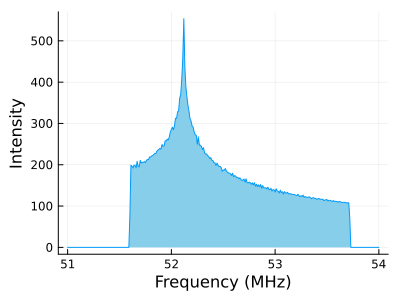

In [2]:
#NMRパラメータの設定
H0 = 3.0; #(T)外部磁場
gamma0 = 17.235; #(MHz/T)核磁気回転比

#等方的ナイトシフト
Kiso = 1.5; #(%)
#異方的ナイトシフト。Kanx+Kany+Kanz=0, |Kanz|>|Kanx|>|Kany|
Kanz = 2.4;#(%)
Kanx = -1.7;#(%)
Kany = -0.7;#(%)

#計算周波数範囲の設定
fmin0 = 51;#MHz
fmax0 = 54;#MHz
df0   = 0.01;#MHz

nu0 = H0*gamma0; #(MHz) K=0の共鳴周波数
KX = (Kiso+Kanx)/100;
KY = (Kiso+Kany)/100;
KZ = (Kiso+Kanz)/100;

calfreq = collect(fmin0:df0:fmax0);#周波数の列を作る
nagasa = length(calfreq);
answave = zeros(nagasa, 2); #周波数分の列で2行の行列を作る
answave[:,1] = calfreq;           #一列目に周波数を代入

function main()
    freq1 = [0.0]
    int1 = [0.0]
    for θ = 0:0.002:π/2
        for φ = 0:0.02:π/2
            freq0 = nu0*(1.0 + KZ*cos(θ)^2+sin(θ)^2*(KX*cos(φ)^2+KY*sin(φ)^2))#共鳴周波数
            int0 = abs(sin(θ)) #遷移確率はθに比例
            freq1 = push!(freq1, freq0)
            int1 = push!(int1, int0)
        end
    end
    for jjj = 1:nagasa
        answave[jjj,2] = answave[jjj, 2] + sum(int1 .* (freq1 .<= (answave[jjj, 1] + df0/2)) .* (freq1 .> (answave[jjj,1] - df0/2)))
    end
end

@time main()
plot(answave[:,1], answave[:,2], fill = (0, :skyblue))
plot!(xlabel="Frequency (MHz)", ylabel="Intensity", legend=false, size=(400,300))

## 軸対称の異方的ナイトシフトによる粉末パターンスペクトル

  0.001790 seconds (13.59 k allocations: 3.952 MiB)


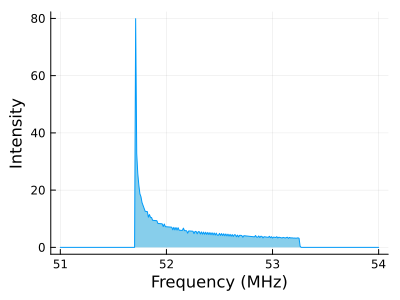

In [3]:
#NMRパラメータの設定
H0 = 3.0; #(T)外部磁場
gamma0 = 17.235; #(MHz/T)核磁気回転比

#等方的ナイトシフト
Kiso = 1.0; #(%)
#異方的ナイトシフト
Kan = 1.0;#(%)

#計算周波数範囲の設定
fmin0 = 51;#MHz
fmax0 = 54;#MHz
df0   = 0.01;#MHz

nu0 = H0*gamma0; #(MHz) K=0の共鳴周波数
Kiso = Kiso/100;#%の入力を処理
Kan = Kan/100;#%の入力を処理

calfreq = collect(fmin0:df0:fmax0);#周波数の列を作る
nagasa = length(calfreq);
answave = zeros(nagasa, 2); #周波数分の列で2行の行列を作る
answave[:,1] = calfreq;           #一列目に周波数を代入\

function main()
    freq1 = [0.0]
    int1 = [0.0]
    for θ = 0:0.001:π/2
        freq0 = nu0*(1.0 + Kiso + Kan*(3*cos(θ)^2 - 1))#共鳴周波数
        int0 = abs(sin(θ)) #遷移確率はθに比例
        freq1 = push!(freq1, freq0)
        int1 = push!(int1, int0)
    end
    for jjj = 1:nagasa
        answave[jjj,2] = answave[jjj, 2] + sum(int1 .* (freq1 .<= (answave[jjj, 1] + df0/2)) .* (freq1 .> (answave[jjj,1] - df0/2)))
    end
end

@time main()
plot(answave[:,1], answave[:,2], fill = (0, :skyblue))
plot!(xlabel="Frequency (MHz)", ylabel="Intensity", legend=false, size=(400,300))